In [1]:
import matplotlib.pyplot as plt


In [2]:
import csv
import pandas as pd

In [3]:
# Read the CSV file into a DataFrame
file = 'IMDb_All_Genres_etf_clean1.csv'
df = pd.read_csv(file)

# Display the DataFrame
df

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


In [4]:
# Create a dictionary to map each movie to its rating
movie_rating_map = {}

# Create a dictionary to map each movie to its runtime
movie_runtime_map = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    movie = row['Movie_Title']
    rating = row['Rating']  #'Rating' contains movie ratings
    runtime = row['Runtime(Mins)'] #'Runtime(Mins)' contains the movie runtime
    
    # Add the movie and its rating to the dictionary
    movie_rating_map[movie] = rating

    # Add the movie and its runtime to the dictionary
    movie_runtime_map[movie] = runtime



In [5]:
# The movie for which you want to find similar movies
target_movie = 'The Dark Knight' 

In [6]:
from sklearn.metrics.pairwise import pairwise_distances

In [7]:
# Calculate pairwise Euclidean distance between movies based on their ratings
ratings = df['Rating'].values.reshape(-1, 1)
euclidean_distances_rating = pairwise_distances(ratings, metric='euclidean')

# Calculate pairwise Euclidean distance between movies based on their runtime
runtime = df['Runtime(Mins)'].values.reshape(-1, 1)
euclidean_distances_runtime = pairwise_distances(runtime, metric='euclidean')

# Convert the Euclidean distance matrix into a DataFrame 
euclidean_distances_rating_df = pd.DataFrame(euclidean_distances_rating, index=df['Movie_Title'], columns=df['Movie_Title'])
euclidean_distances_runtime_df = pd.DataFrame(euclidean_distances_runtime, index=df['Movie_Title'], columns=df['Movie_Title'])

# Get the distance scores for the target movie based on rating
distances_rating = euclidean_distances_rating_df[target_movie].sort_values(ascending=True)

# Get the distance scores for the target movie based on runtime
distances_runtime = euclidean_distances_runtime_df[target_movie].sort_values(ascending=True)

# Exclude the target movie from the top 10 list of similar movies
similar_movies_rating = distances_rating.drop(target_movie)
similar_movies_runtime = distances_runtime.drop(target_movie)

# Print the top 10 similar movies based on rating
top_similar_movies_rating = similar_movies_rating.head(10)
print("Ratings Clusters: ", top_similar_movies_rating)

# Print the top 10 similar movies based on runtime
top_similar_movies_runtime = similar_movies_runtime.head(10)
print("Runtime Clusters: ", top_similar_movies_runtime)

Ratings Clusters:  Movie_Title
12 Angry Men                                     0.0
The Lord of the Rings: The Return of the King    0.0
Schindler's List                                 0.0
Aynabaji                                         0.0
The Godfather Part II                            0.0
777 Charlie                                      0.1
Rocketry: The Nambi Effect                       0.1
Jai Bhim                                         0.1
Pulp Fiction                                     0.1
Hababam Sinifi                                   0.2
Name: The Dark Knight, dtype: float64
Runtime Clusters:  Movie_Title
Ford v Ferrari                             0.0
Doctor Sleep                               0.0
The Majestic                               0.0
Gangubai Kathiawadi                        0.0
Drishyam 2                                 0.0
All Quiet on the Western Front             0.0
Batman v Superman: Dawn of Justice         0.0
Gunday                                   

In [8]:
from sklearn.cluster import KMeans

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


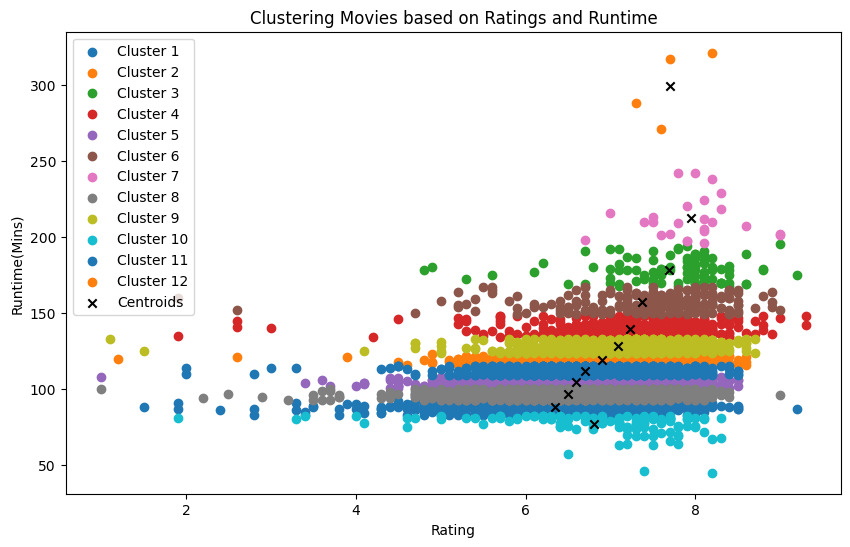

Cluster 1: Size - 668
	The Iron Giant, Rating: 8.1, Runtime: 86 mins
	Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni, Rating: 8.0, Runtime: 87 mins
	Knockin' on Heaven's Door, Rating: 7.9, Runtime: 87 mins
	Kôkaku Kidôtai, Rating: 7.9, Runtime: 83 mins
	Taken, Rating: 7.8, Runtime: 90 mins
	Zombieland, Rating: 7.6, Runtime: 88 mins
	Kung Fu Panda, Rating: 7.6, Runtime: 92 mins
	Nobody, Rating: 7.4, Runtime: 92 mins
	Black Dynamite, Rating: 7.4, Runtime: 84 mins
	Assault on Precinct 13, Rating: 7.3, Runtime: 91 mins
	Kung Fu Panda 2, Rating: 7.2, Runtime: 90 mins
	The Witcher: Nightmare of the Wolf, Rating: 7.2, Runtime: 83 mins
	The Transformers: The Movie, Rating: 7.2, Runtime: 84 mins
	Django, Rating: 7.2, Runtime: 91 mins
	Mosul, Rating: 7.1, Runtime: 86 mins
	Dragon Ball Z: Doragon bôru Z - Kami to Kami, Rating: 7.1, Runtime: 85 mins
	Banlieue 13, Rating: 7.1, Runtime: 84 mins
	Greyhound, Rating: 7.0, Runtime: 91 mins
	Chronicle, Rating: 7.0, Runtime: 89 mins
	Bronson, 

In [9]:
# Select the features for clustering (ratings and runtime)
X = df[['Rating', 'Runtime(Mins)']].values

# Set k value
k = 12  

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each movie
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = X[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroids')
plt.xlabel('Rating')
plt.ylabel('Runtime(Mins)')
plt.title('Clustering Movies based on Ratings and Runtime')
plt.legend()
plt.show()

# Group similar ratings and runtime in clusters
# Print the movies in each cluster based on ratings and runtime
for cluster in range(num_clusters):
    cluster_movies = df[cluster_labels == cluster]
    print(f'Cluster {cluster+1}: Size - {cluster_movies.shape[0]}')
    for index, row in cluster_movies.iterrows():
        print(f"\t{row['Movie_Title']}, Rating: {row['Rating']}, Runtime: {row['Runtime(Mins)']} mins")